<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Breast_Cancer.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Breast Cancer Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Binary classification | Predict if a tumor is benign or malignant |


## About the dataset

The [Breast Cancer][1] dataset is used for multivariate binary classification. There are 569 total samples with 30 features each. Features were computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.

![](images/breast-cancer-logo.jpg)

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## Package setup

In [177]:
#DO THE NECESSARY IMPORTS
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler


# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data
**EXERCISE: In a similar was as you did with iris and wine ;).**

In [178]:
dataset = load_breast_cancer()

In [179]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [180]:
# Put data in a pandas DataFrame
df_cancer = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [197]:
# Add target and class to DataFrame
df_cancer["target"] = dataset.target
df_cancer["class"] = dataset.target_names[dataset.target]
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1,benign


Since the original labels are in 0,1 format, we could change the labels to benign and malignant using .replace function. Using inplace=True will modify the dataframe breast_dataset.
**Optional**

In [182]:
#df_cancer['target'].replace(0, 'Malignant',inplace=True)
#df_cancer['target'].replace(1, 'Benign',inplace=True)
#if we do this we should also drop the class
#df_cancer = df_cancer.drop('class', axis=1)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


## Visualizing the Breast Cancer data

### Select your X and y's

In [183]:
# YOUR CODE HERE
X = df_cancer.iloc[:,0:-2]
y = df_cancer["target"]

In [198]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

### Step 2: Normalize the data in X

In [185]:
#do the necessary imports (you can also do them all above)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [186]:
X_scaled = pd.DataFrame(X_scaled)

### Optional

Convert this to a pandas dataframe again in order to visualize it. 

In [187]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Short exercise
Let's check whether the normalized data has a mean of zero and a standard deviation of one. **Those are indicators of proper normalization**

In [188]:
np.mean(X_scaled), np.std(X_scaled)

(0    -3.162867e-15
 1    -6.530609e-15
 2    -7.078891e-16
 3    -8.799835e-16
 4     6.132177e-15
 5    -1.120369e-15
 6    -4.421380e-16
 7     9.732500e-16
 8    -1.971670e-15
 9    -1.453631e-15
 10   -9.076415e-16
 11   -8.853492e-16
 12    1.773674e-15
 13   -8.291551e-16
 14   -7.541809e-16
 15   -3.921877e-16
 16    7.917900e-16
 17   -2.739461e-16
 18   -3.108234e-16
 19   -3.366766e-16
 20   -2.333224e-15
 21    1.763674e-15
 22   -1.198026e-15
 23    5.049661e-16
 24   -5.213170e-15
 25   -2.174788e-15
 26    6.856456e-16
 27   -1.412656e-16
 28   -2.289567e-15
 29    2.575171e-15
 dtype: float64,
 0     1.0
 1     1.0
 2     1.0
 3     1.0
 4     1.0
 5     1.0
 6     1.0
 7     1.0
 8     1.0
 9     1.0
 10    1.0
 11    1.0
 12    1.0
 13    1.0
 14    1.0
 15    1.0
 16    1.0
 17    1.0
 18    1.0
 19    1.0
 20    1.0
 21    1.0
 22    1.0
 23    1.0
 24    1.0
 25    1.0
 26    1.0
 27    1.0
 28    1.0
 29    1.0
 dtype: float64)

## Apply the PCA Method

In [189]:
#do the necessary imports
pca = PCA(2)

In [190]:
components = pca.fit_transform(X_scaled)

In [191]:
df_components = pd.DataFrame(data=components, columns=["principal component 1", "principal component 2"])

In [192]:
df_components.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Next, let's create a **new DataFrame** that will have the principal component values for all the samples.

Once you have the principal components, you can find the **explained_variance_ratio**. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [193]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the principal component 1 holds **44.2%** of the information while the principal component 2 holds only **19%** of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

## Plotting the visualization

<Figure size 432x288 with 0 Axes>

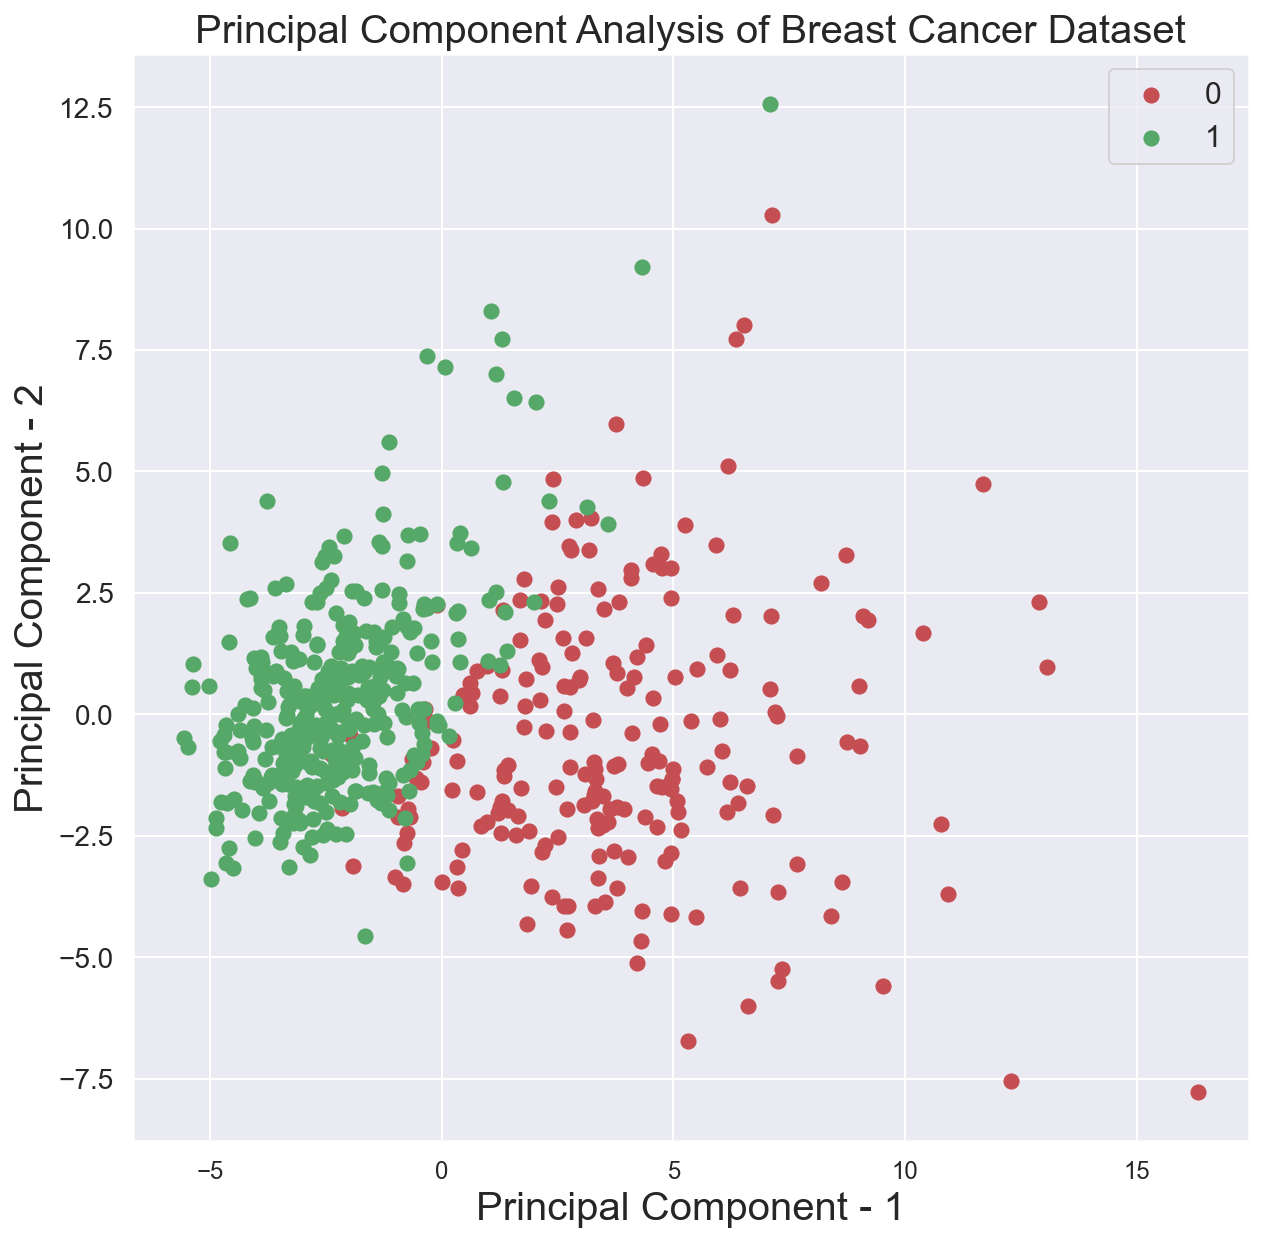

In [213]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_cancer['target'] == target
    plt.scatter(df_components.loc[indicesToKeep, 'principal component 1']
               , df_components.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Additional Challenge: Can you fix the labels in the plot so they are the original classes? 
Benign and Malign instead of 1 and 0

<Figure size 432x288 with 0 Axes>

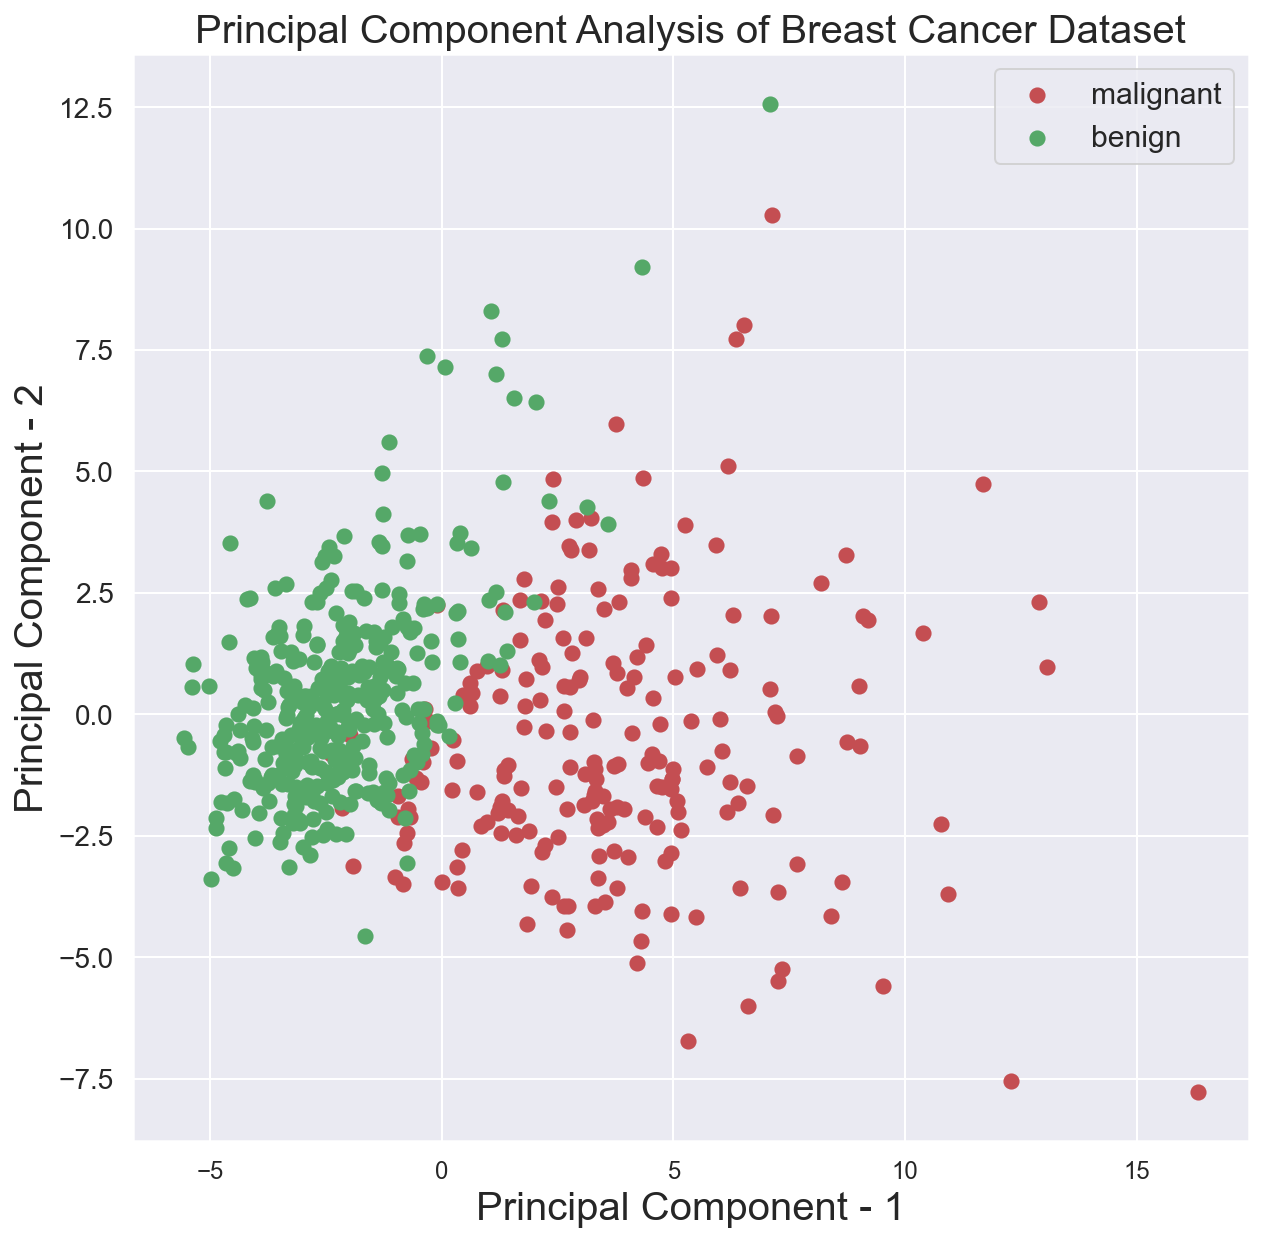

In [212]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ["malignant", "benign"]
#print(targets)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_cancer["class"] == target
    plt.scatter(df_components.loc[indicesToKeep, 'principal component 1']
               , df_components.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})